In [1]:
import pandas as pd

# Humedad

In [2]:
df_hum= pd.read_csv('data/SIATA/82_hum.csv')

In [3]:
df_hum.head()

,codigo,fecha_hora,humedad,calidad,Humedad,Calidad
0,82.0,2018-01-01 00:00:00,88.4,1.0,NaN,NaN
1,82.0,2018-01-01 00:01:00,88.4,1.0,NaN,NaN
2,82.0,2018-01-01 00:02:00,88.4,1.0,NaN,NaN
3,82.0,2018-01-01 00:03:00,88.2,1.0,NaN,NaN
4,82.0,2018-01-01 00:04:00,88.3,1.0,NaN,NaN


In [4]:
# Calculate a new column 'Humedad_corregida' based on that there are two columns 'Humedad' (with a capital 'H') and 'humedad' (with a lowercase 'h')
# Take the value of 'Humedad' if it is not null, otherwise take the value of 'humedad'
df_hum['Humedad_corregida'] = df_hum['Humedad'].combine_first(df_hum['humedad'])


In [5]:
df_hum['Calidad_corregida'] = df_hum['Calidad'].combine_first(df_hum['calidad'])

In [6]:
df_hum[df_hum['Humedad_corregida'].isna()].shape[0]

0

<Axes: >

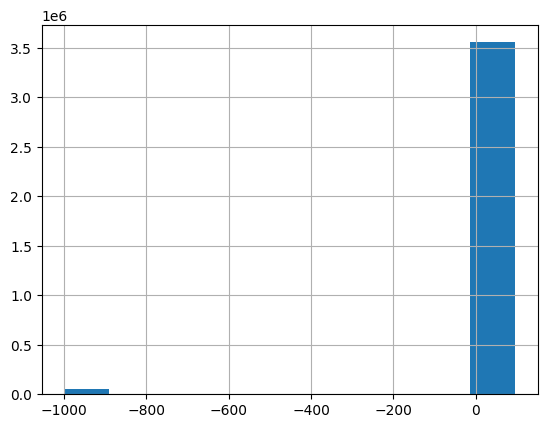

In [7]:
df_hum['Humedad_corregida'].hist()

In [8]:
# Replace all the -999.0 values in 'Humedad_corregida' with NaN
df_hum['Humedad_corregida'].replace(-999.0, pd.NA, inplace=True)

C:\Users\dinue\AppData\Local\Temp\ipykernel_22956\3512907347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hum['Humedad_corregida'].replace(-999.0, pd.NA, inplace=True)


In [9]:
# Replace all the zero values in 'Humedad_corregida' with NaN
df_hum['Humedad_corregida']=df_hum['Humedad_corregida'].replace(0.0, pd.NA)

In [10]:
# Replace all the values in the 'Humedad_corregida' column which 'Calidad_corregida' is greater than 1 with NaN
df_hum.loc[df_hum['Calidad_corregida'] > 1, 'Humedad_corregida'] = pd.NA

In [11]:
df_hum.shape

(3609813, 8)

## Conversión a datos horarios

In [12]:
# The data has a minutely frequency, so we can resample it to an hourly frequency
df_hum.set_index('fecha_hora', inplace=True)

In [13]:
df_hum.head()

,codigo,humedad,calidad,Humedad,Calidad,Humedad_corregida,Calidad_corregida
fecha_hora,,,,,,,
2018-01-01 00:00:00,82.0,88.4,1.0,NaN,NaN,88.4,1.0
2018-01-01 00:01:00,82.0,88.4,1.0,NaN,NaN,88.4,1.0
2018-01-01 00:02:00,82.0,88.4,1.0,NaN,NaN,88.4,1.0
2018-01-01 00:03:00,82.0,88.2,1.0,NaN,NaN,88.2,1.0
2018-01-01 00:04:00,82.0,88.3,1.0,NaN,NaN,88.3,1.0


In [14]:
# Convert the index to a datetime object
df_hum.index = pd.to_datetime(df_hum.index, format='%Y-%m-%d %H:%M:%S')

In [15]:
# Resample the data to an hourly frequency, taking the mean, median, min and max of the 'Humedad_corregida' column
df_hum_resampled = df_hum['Humedad_corregida'].resample('H').agg(['mean', 'median', 'min', 'max'])

C:\Users\dinue\AppData\Local\Temp\ipykernel_22956\1120586378.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hum_resampled = df_hum['Humedad_corregida'].resample('H').agg(['mean', 'median', 'min', 'max'])
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanf

In [16]:
df_hum_resampled.head()

,mean,median,min,max
fecha_hora,,,,
2018-01-01 00:00:00,88.248333,88.75,84.6,89.4
2018-01-01 01:00:00,85.5,85.3,83.4,87.5
2018-01-01 02:00:00,86.633333,86.65,84.7,88.5
2018-01-01 03:00:00,83.178333,83.9,78.5,85.5
2018-01-01 04:00:00,82.196667,82.3,80.0,85.4


In [17]:
df_hum_resampled.isna().sum()

mean      2212
median    2212
min       2212
max       2212
dtype: int64

In [18]:
df_hum_resampled[df_hum_resampled['mean'].isna()].head()

,mean,median,min,max
fecha_hora,,,,
2018-01-03 07:00:00,NaN,NaN,NaN,NaN
2018-01-19 00:00:00,NaN,NaN,NaN,NaN
2018-01-19 07:00:00,NaN,NaN,NaN,NaN
2018-01-19 08:00:00,NaN,NaN,NaN,NaN
2018-01-19 09:00:00,NaN,NaN,NaN,NaN


In [19]:
# Rename the columns to specify the variable and the statistic
df_hum_resampled.columns = ['Humedad_mean', 'Humedad_median', 'Humedad_min', 'Humedad_max']

In [20]:
df_hum_resampled.to_csv('data/SIATA/82_hum_hr.csv')

# Presión atmosférica

In [21]:
df_patm= pd.read_csv('data/SIATA/82_patm.csv')

In [22]:
df_patm.head()

,codigo,fecha_hora,presion,calidad,Presion,Calidad
0,82.0,2018-01-01 00:00:00,866.6,1.0,NaN,NaN
1,82.0,2018-01-01 00:01:00,866.6,1.0,NaN,NaN
2,82.0,2018-01-01 00:02:00,866.5,1.0,NaN,NaN
3,82.0,2018-01-01 00:03:00,866.5,1.0,NaN,NaN
4,82.0,2018-01-01 00:04:00,866.5,1.0,NaN,NaN


In [23]:
df_patm['Presion_corregida'] = df_patm['Presion'].combine_first(df_patm['presion'])

In [24]:
df_patm['Calidad_corregida'] = df_patm['Calidad'].combine_first(df_patm['calidad'])

In [25]:
df_patm['Presion_corregida'].replace(-999.0, pd.NA, inplace=True)

C:\Users\dinue\AppData\Local\Temp\ipykernel_22956\2990545465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_patm['Presion_corregida'].replace(-999.0, pd.NA, inplace=True)


In [26]:
df_patm.loc[df_patm['Calidad_corregida'] > 1, 'Presion_corregida'] = pd.NA

In [27]:
df_patm['Presion_corregida'].isna().sum()/df_patm.shape[0]

np.float64(0.03131159425709864)

<Axes: >

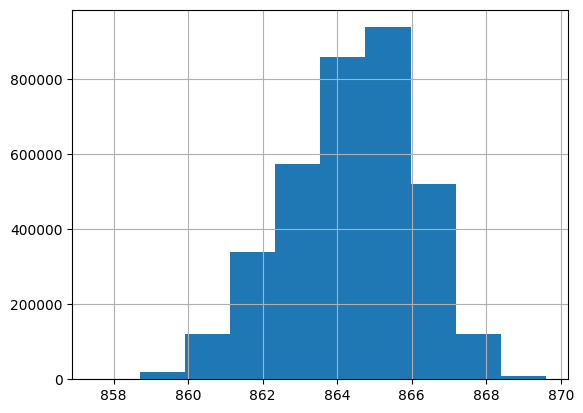

In [28]:
df_patm['Presion_corregida'].hist()

In [29]:
# Convert 'fecha_hora' to datetime and set it as index
df_patm.set_index('fecha_hora', inplace=True)
df_patm.index = pd.to_datetime(df_patm.index, format='%Y-%m-%d %H:%M:%S')

In [30]:
# Resample the data to an hourly frequency, taking the mean, median, min and max of the 'Presion_corregida' column
df_patm_resampled = df_patm['Presion_corregida'].resample('h').agg(['mean', 'median', 'min', 'max'])

c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [31]:
df_patm_resampled.isna().sum()/ df_patm_resampled.shape[0]

mean      0.036045
median    0.036045
min       0.036045
max       0.036045
dtype: float64

In [32]:
df_patm_resampled.head()

,mean,median,min,max
fecha_hora,,,,
2018-01-01 00:00:00,866.23,866.3,865.8,866.6
2018-01-01 01:00:00,865.431667,865.4,865.3,865.8
2018-01-01 02:00:00,865.075,865.1,864.6,865.3
2018-01-01 03:00:00,864.605,864.6,864.5,864.7
2018-01-01 04:00:00,864.81,864.8,864.5,865.1


In [33]:
# Rename the columns to specify the variable and the statistic
df_patm_resampled.columns = ['Presion_mean', 'Presion_median', 'Presion_min', 'Presion_max']

In [34]:
df_patm_resampled.to_csv('data/SIATA/82_patm_hr.csv')

# Temperatura

In [35]:
df_temp= pd.read_csv('data/SIATA/82_temp.csv')

In [36]:
df_temp['Temperatura_corregida'] = df_temp['Temperatura'].combine_first(df_temp['temperatura'])

In [37]:
df_temp['Calidad_corregida'] = df_temp['Calidad'].combine_first(df_temp['calidad'])

In [38]:
df_temp['Temperatura_corregida'] = df_temp['Temperatura_corregida'].replace(-999.0, pd.NA)

In [39]:
df_temp.loc[df_temp['Calidad_corregida'] > 1, 'Temperatura_corregida'] = pd.NA

<Axes: >

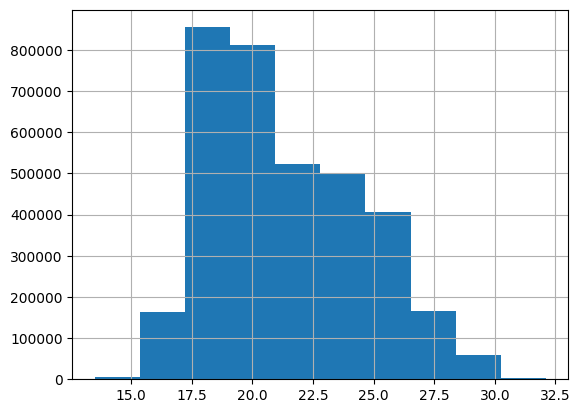

In [40]:
df_temp['Temperatura_corregida'].hist()

In [41]:
# Convert 'fecha_hora' to datetime and set it as index
df_temp.set_index('fecha_hora', inplace=True)
df_temp.index = pd.to_datetime(df_temp.index, format='%Y-%m-%d %H:%M:%S')

In [42]:
df_temp_resampled = df_temp['Temperatura_corregida'].resample('h').agg(['mean', 'median', 'min', 'max'])

c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [43]:
df_temp_resampled.isna().sum()/ df_temp_resampled.shape[0]

mean      0.03611
median    0.03611
min       0.03611
max       0.03611
dtype: float64

In [44]:
# Rename the columns to specify the variable and the statistic
df_temp_resampled.columns = ['Temperatura_mean', 'Temperatura_median', 'Temperatura_min', 'Temperatura_max']

In [45]:
df_temp_resampled.to_csv('data/SIATA/82_temp_hr.csv')

# Viento

In [46]:
df_viento= pd.read_csv('data/SIATA/82_viento.csv')

In [47]:
df_viento.head()

,codigo,fecha_hora,velocidad_prom,velocidad_max,direccion_prom,direccion_max,calidad,Velocidad_Prom,Velocidad_Max,Direccion_Prom,Direccion_Max,Calidad
0,82.0,2018-01-01 00:00:00,1.0,1.3,148.0,166.0,1.0,NaN,NaN,NaN,NaN,NaN
1,82.0,2018-01-01 00:01:00,0.9,1.3,147.0,171.0,1.0,NaN,NaN,NaN,NaN,NaN
2,82.0,2018-01-01 00:02:00,1.0,1.4,145.0,163.0,1.0,NaN,NaN,NaN,NaN,NaN
3,82.0,2018-01-01 00:03:00,1.0,1.3,129.0,156.0,1.0,NaN,NaN,NaN,NaN,NaN
4,82.0,2018-01-01 00:04:00,1.1,1.4,121.0,138.0,1.0,NaN,NaN,NaN,NaN,NaN


In [48]:
df_viento['Velocidad_Prom_corregida'] = df_viento['Velocidad_Prom'].combine_first(df_viento['velocidad_prom'])

In [49]:
df_viento['Calidad_corregida'] = df_viento['Calidad'].combine_first(df_viento['calidad'])

In [50]:
df_viento['Direccion_Prom_corregida'] = df_viento['Direccion_Prom'].combine_first(df_viento['direccion_prom'])

In [51]:
df_viento=df_viento[['fecha_hora', 'Velocidad_Prom_corregida', 'Direccion_Prom_corregida','Calidad_corregida']]

In [52]:
df_viento.head()

,fecha_hora,Velocidad_Prom_corregida,Direccion_Prom_corregida,Calidad_corregida
0,2018-01-01 00:00:00,1.0,148.0,1.0
1,2018-01-01 00:01:00,0.9,147.0,1.0
2,2018-01-01 00:02:00,1.0,145.0,1.0
3,2018-01-01 00:03:00,1.0,129.0,1.0
4,2018-01-01 00:04:00,1.1,121.0,1.0


In [53]:
df_viento.isna().sum()

fecha_hora                  0
Velocidad_Prom_corregida    0
Direccion_Prom_corregida    0
Calidad_corregida           0
dtype: int64

<Axes: >

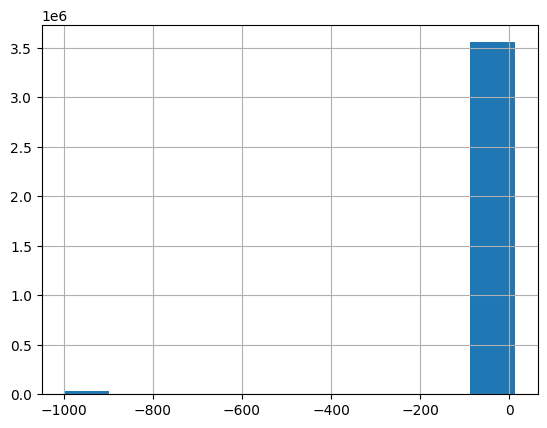

In [54]:
df_viento['Velocidad_Prom_corregida'].hist()

<Axes: >

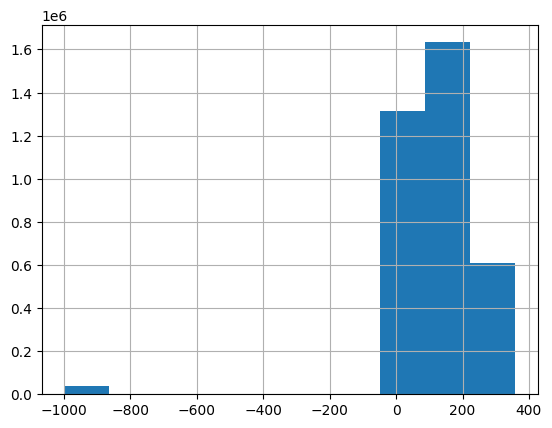

In [55]:
df_viento['Direccion_Prom_corregida'].hist()

In [56]:
df_viento['Velocidad_Prom_corregida'] = df_viento['Velocidad_Prom_corregida'].replace(-999.0, pd.NA)
df_viento['Direccion_Prom_corregida'] = df_viento['Direccion_Prom_corregida'].replace(-999.0, pd.NA)

In [57]:
df_viento.loc[df_viento['Calidad_corregida'] > 1, 'Velocidad_Prom_corregida'] = pd.NA
df_viento.loc[df_viento['Calidad_corregida'] > 1, 'Direccion_Prom_corregida'] = pd.NA

In [58]:
df_viento.isna().sum()/df_viento.shape[0]

fecha_hora                  0.00000
Velocidad_Prom_corregida    0.02743
Direccion_Prom_corregida    0.02743
Calidad_corregida           0.00000
dtype: float64

In [59]:
# Convert 'fecha_hora' to datetime and set it as index
df_viento.set_index('fecha_hora', inplace=True)
df_viento.index = pd.to_datetime(df_viento.index, format='%Y-%m-%d %H:%M:%S')

In [60]:
# Resample the data to an hourly frequency, taking the mean, median, min and max of the 'Velocidad_Prom_corregida' and 'Direccion_Prom_corregida' columns
df_viento_resampled = df_viento.resample('h').agg({
    'Velocidad_Prom_corregida': ['mean', 'median', 'min', 'max'],
    'Direccion_Prom_corregida': ['mean', 'median', 'min', 'max']
})

# Flatten the MultiIndex columns and rename them as requested
df_viento_resampled.columns = [
    f"Velocidad_{stat}" if col == 'Velocidad_Prom_corregida' else f"Direccion_{stat}"
    for col, stat in df_viento_resampled.columns
]

c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [61]:
df_viento_resampled.head()

,Velocidad_mean,Velocidad_median,Velocidad_min,Velocidad_max,Direccion_mean,Direccion_median,Direccion_min,Direccion_max
fecha_hora,,,,,,,,
2018-01-01 00:00:00,0.926667,0.95,0.1,2.1,167.95,145.0,111.0,340.0
2018-01-01 01:00:00,0.938333,0.8,0.1,2.2,185.75,159.5,104.0,356.0
2018-01-01 02:00:00,0.675,0.55,0.1,1.7,156.5,162.5,20.0,347.0
2018-01-01 03:00:00,0.733333,0.7,0.2,1.8,140.983333,134.0,15.0,355.0
2018-01-01 04:00:00,0.66,0.6,0.0,1.3,168.85,145.5,1.0,350.0


In [62]:
df_viento_resampled.isna().sum()/ df_viento_resampled.shape[0]

Velocidad_mean      0.03611
Velocidad_median    0.03611
Velocidad_min       0.03611
Velocidad_max       0.03611
Direccion_mean      0.03611
Direccion_median    0.03611
Direccion_min       0.03611
Direccion_max       0.03611
dtype: float64

In [63]:
# Export the resampled data to a CSV file
df_viento_resampled.to_csv('data/SIATA/82_viento_hr.csv')

# Precipitación

In [64]:
df_prec= pd.read_csv('data/SIATA/82_prec.csv')

In [65]:
df_prec.head()

,fecha_hora,P1,P2,Calidad
0,2018-01-01 00:00:00,0.0,-999,1
1,2018-01-01 00:01:00,0.0,-999,1
2,2018-01-01 00:02:00,0.0,-999,1
3,2018-01-01 00:03:00,0.0,-999,1
4,2018-01-01 00:04:00,0.0,-999,1


In [66]:
df_prec['P1'] = df_prec['P1'].replace(-999.0, pd.NA)
df_prec['P2'] = df_prec['P2'].replace(-999.0, pd.NA)

In [67]:
df_prec.head()

,fecha_hora,P1,P2,Calidad
0,2018-01-01 00:00:00,0.0,<NA>,1
1,2018-01-01 00:01:00,0.0,<NA>,1
2,2018-01-01 00:02:00,0.0,<NA>,1
3,2018-01-01 00:03:00,0.0,<NA>,1
4,2018-01-01 00:04:00,0.0,<NA>,1


In [68]:
df_prec['Precipitacion_corregida'] = df_prec['P1'].combine_first(df_prec['P2'])

In [69]:
df_prec.head()

,fecha_hora,P1,P2,Calidad,Precipitacion_corregida
0,2018-01-01 00:00:00,0.0,<NA>,1,0.0
1,2018-01-01 00:01:00,0.0,<NA>,1,0.0
2,2018-01-01 00:02:00,0.0,<NA>,1,0.0
3,2018-01-01 00:03:00,0.0,<NA>,1,0.0
4,2018-01-01 00:04:00,0.0,<NA>,1,0.0


In [70]:
df_prec.isna().sum()/ df_prec.shape[0]

fecha_hora                 0.000000
P1                         0.065826
P2                         1.000000
Calidad                    0.000000
Precipitacion_corregida    0.065826
dtype: float64

In [71]:
# Replace all the values in the 'Precipitacion_corregida' column which 'Calidad' is greater than 1 with NaN
df_prec.loc[df_prec['Calidad'] > 1, 'Precipitacion_corregida'] = pd.NA

In [72]:
# Resample the data to an hourly frequency, taking the mean, median, min and max of the 'Precipitacion_corregida' column
df_prec.set_index('fecha_hora', inplace=True)
df_prec.index = pd.to_datetime(df_prec.index, format='%Y-%m-%d %H:%M:%S')
df_prec_resampled = df_prec['Precipitacion_corregida'].resample('h').agg(['mean', 'median', 'min', 'max'])

c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\AQI_Predict\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [73]:
df_prec_resampled.head()

,mean,median,min,max
fecha_hora,,,,
2018-01-01 00:00:00,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,0.0,0.0,0.0,0.0


In [74]:
df_prec_resampled.isna().sum()/ df_prec_resampled.shape[0]

mean      0.082388
median    0.082388
min       0.082388
max       0.082388
dtype: float64

In [75]:
# Rename the columns to specify the variable and the statistic
df_prec_resampled.columns = ['Precipitacion_mean', 'Precipitacion_median', 'Precipitacion_min', 'Precipitacion_max']

In [76]:
# Export the resampled data to a CSV file
df_prec_resampled.to_csv('data/SIATA/82_prec_hr.csv')

# Concatenar todas las variables meteorologicas

In [57]:
df_hum_resampled = pd.read_csv('data/SIATA/82_hum_hr.csv', index_col=0, parse_dates=True)
df_patm_resampled = pd.read_csv('data/SIATA/82_patm_hr.csv', index_col=0, parse_dates=True)
df_temp_resampled = pd.read_csv('data/SIATA/82_temp_hr.csv', index_col=0, parse_dates=True)
df_viento_resampled = pd.read_csv('data/SIATA/82_viento_hr.csv', index_col=0, parse_dates=True)
df_prec_resampled = pd.read_csv('data/SIATA/82_prec_hr.csv', index_col=0, parse_dates=True)

In [58]:
df_viento_resampled.head()

,Velocidad_mean,Velocidad_median,Velocidad_min,Velocidad_max,Direccion_mean,Direccion_median,Direccion_min,Direccion_max
fecha_hora,,,,,,,,
2018-01-01 00:00:00,0.926667,0.95,0.1,2.1,167.950000,145.0,111.0,340.0
2018-01-01 01:00:00,0.938333,0.80,0.1,2.2,185.750000,159.5,104.0,356.0
2018-01-01 02:00:00,0.675000,0.55,0.1,1.7,156.500000,162.5,20.0,347.0
2018-01-01 03:00:00,0.733333,0.70,0.2,1.8,140.983333,134.0,15.0,355.0
2018-01-01 04:00:00,0.660000,0.60,0.0,1.3,168.850000,145.5,1.0,350.0


In [77]:
# Join all the resampled dataframes into a single dataframe
df_all_resampled = pd.concat([
    df_hum_resampled,
    df_patm_resampled,
    df_temp_resampled,
    df_viento_resampled,
    df_prec_resampled
], axis=1)

In [78]:
df_all_resampled.head()

,Humedad_mean,Humedad_median,Humedad_min,Humedad_max,Presion_mean,Presion_median,Presion_min,Presion_max,Temperatura_mean,Temperatura_median,...,Velocidad_min,Velocidad_max,Direccion_mean,Direccion_median,Direccion_min,Direccion_max,Precipitacion_mean,Precipitacion_median,Precipitacion_min,Precipitacion_max
fecha_hora,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,88.248333,88.75,84.6,89.4,866.23,866.3,865.8,866.6,17.388333,17.3,...,0.1,2.1,167.95,145.0,111.0,340.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,85.5,85.3,83.4,87.5,865.431667,865.4,865.3,865.8,16.903333,17.1,...,0.1,2.2,185.75,159.5,104.0,356.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,86.633333,86.65,84.7,88.5,865.075,865.1,864.6,865.3,16.231667,16.2,...,0.1,1.7,156.5,162.5,20.0,347.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,83.178333,83.9,78.5,85.5,864.605,864.6,864.5,864.7,16.311667,16.3,...,0.2,1.8,140.983333,134.0,15.0,355.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,82.196667,82.3,80.0,85.4,864.81,864.8,864.5,865.1,16.778333,16.8,...,0.0,1.3,168.85,145.5,1.0,350.0,0.0,0.0,0.0,0.0


In [80]:
df_viento_resampled.shape, df_hum_resampled.shape, df_patm_resampled.shape, df_temp_resampled.shape, df_prec_resampled.shape, df_all_resampled.shape

((61368, 8), (61368, 4), (61368, 4), (61368, 4), (61368, 4), (61368, 24))

In [81]:
df_all_resampled.to_csv('data/SIATA/82_meteo_hr.csv')